In [1]:
# import sys
# !{sys.executable} -m pip install rasterio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True


In [3]:
file_name = 'RGI60-02.04403_thickness.tif'
import rasterio as rio
import numpy as np
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = np.nan

In [4]:
thickness = np.reshape(thickness, (216580,))

In [5]:
f = thickness[~np.isnan(thickness)]


(array([23628., 12213.,  6657.,  4559.,  3911.,  4805.,  3701.,  2418.,
         1940.,  1143.]),
 array([  5.50863791,  48.4973526 ,  91.48606873, 134.47477722,
        177.46350098, 220.45220947, 263.44091797, 306.42962646,
        349.41836548, 392.40707397, 435.39578247]),
 <BarContainer object of 10 artists>)

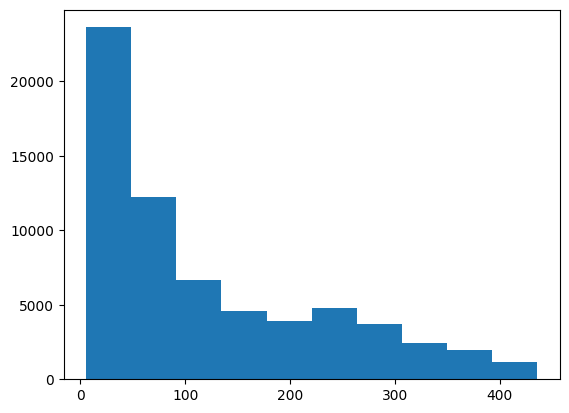

In [6]:
plt.hist(f)

In [7]:
u1 = (f * 0.35)
m1 = np.mean(u1)
u2 = (f * 0.35)**2
m2 = np.mean(u2)

Text(0.5, 0, 'Estimated Uncertainty (m$^2$)')

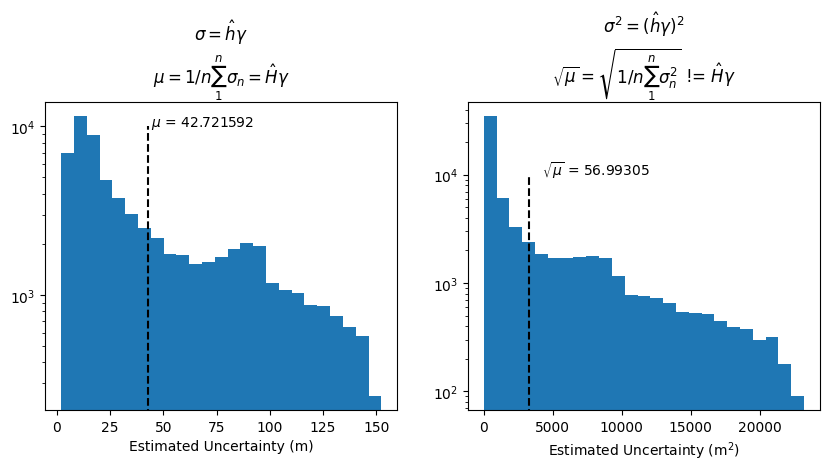

In [21]:
fig, ax = plt.subplots(1,2,figsize = (10,4))

ax[0].hist((u1), 25)
ax[0].plot(
    [np.mean(u1),np.mean(u1)],
    [0,10000], 'k--'
)
ax[0].text(    
    (u1).mean() + 1.5,
    10000, s = '$\mu$ = ' + str(m1)
)
ax[0].set_yscale('log')
ax[0].set_title(
    '$\sigma = \hat{h} \gamma$\n' + 
    '$\mu = 1/n \sum_{1}^{n}\sigma_{n} = \hat{H} \gamma$'
)
ax[0].set_xlabel('Estimated Uncertainty (m)')
ax[1].hist((u2), 25)
ax[1].plot(
    [np.mean(u2),np.mean(u2)],
    [0,10000], 'k--'
)
ax[1].text(    
    (u2).mean() + 1000,
    10000, s = '$\sqrt{\mu}$ = ' + str(np.sqrt(m2))
)
ax[1].set_yscale('log')
ax[1].set_title(
    '$\sigma^2 =(\hat{h} \gamma)^2$\n' + 
    '$\sqrt{\mu} = \sqrt{1/n \sum_{1}^{n}\sigma_{n}^2}$ != $ \hat{H}\gamma$'
)
ax[1].set_xlabel('Estimated Uncertainty (m$^2$)')
# plt.suptitle(    '25x25m$^2$ Thickness Estimate Uncertainties',y = 1.17)

In [9]:
np.mean(f)

122.0617